In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [30]:
dir = '/content/drive/MyDrive/Data Challenge/Dataset/'

In [31]:
# Load datasets
population = pd.read_excel(dir + 'population.xlsx')
death = pd.read_excel(dir + 'death.xlsx')
birth = pd.read_excel(dir + 'birth.xlsx')
migration = pd.read_excel(dir + 'migration.xlsx')

In [32]:
population.head()

,City,2019,2020,2021,2022,2023,2024
0,Республика Казахстан,18395567,18631779,18879552,19503159,19766807,20033842
1,Абай,0,0,0,611888,610198,607589
2,Акмолинская,738587,736735,735566,785708,788013,787976
3,Актюбинская,869637,881651,894333,916750,928159,939405
4,Алматинская,2038935,2055724,2077967,1478496,1505896,1531167


In [33]:
# Define cities and remove specified cities from analysis
cities = population['City']
cities_to_remove = ['Абай', 'Жетісу', 'Ұлытау']
cities = cities[~np.isin(cities, cities_to_remove)]

In [34]:
# Drop city column from datasets for further processing
population = population.drop(columns=['City'])
death = death.drop(columns=['City'])
birth = birth.drop(columns=['City'])
migration = migration.drop(columns=['City'])

In [35]:
# Clean numeric data function
def clean_numeric(data):
    return data.apply(lambda x: x.astype(str).str.replace(" ", "").str.replace("-", "0").str.replace(",", "").astype(int))

# Apply cleaning to each dataset
population = clean_numeric(population)
death = clean_numeric(death)
birth = clean_numeric(birth)
migration = clean_numeric(migration)

In [36]:
# Restore the 'City' column in each dataset
population['City'] = cities
birth['City'] = cities
death['City'] = cities
migration['City'] = cities

In [37]:
# Prepare years for projection
years_past = np.array([])

for col in population.columns[:-1]:
  if col != 2024:
    years_past =np.append(years_past, (int(col)))
years_future = np.array([2024, 2025, 2026, 2027, 2028, 2029])

print(years_past)

# Create empty DataFrames to store projections
birth_proj = pd.DataFrame(columns=['City',2024, 2025, 2026, 2027, 2028, 2029])
death_proj = pd.DataFrame(columns=['City',2024, 2025, 2026, 2027, 2028, 2029])
migration_proj = pd.DataFrame(columns=['City',2024, 2025, 2026, 2027, 2028, 2029])

birth_proj['City'] = cities
death_proj['City'] = cities
migration_proj['City'] = cities

population_proj = pd.DataFrame(columns=['City',2023,2024, 2025, 2026, 2027, 2028, 2029])
population_proj[2023] = population[2023]
population_proj['City'] = cities

print(population_proj)

# Set a random seed for reproducibility
np.random.seed(42)

[2019. 2020. 2021. 2022. 2023.]
                      City      2023 2024 2025 2026 2027 2028 2029
0    Республика Казахстан   19766807  NaN  NaN  NaN  NaN  NaN  NaN
1                      NaN    610198  NaN  NaN  NaN  NaN  NaN  NaN
2              Акмолинская    788013  NaN  NaN  NaN  NaN  NaN  NaN
3              Актюбинская    928159  NaN  NaN  NaN  NaN  NaN  NaN
4              Алматинская   1505896  NaN  NaN  NaN  NaN  NaN  NaN
5               Атырауская    693079  NaN  NaN  NaN  NaN  NaN  NaN
6    Западно-Казахстанская    688127  NaN  NaN  NaN  NaN  NaN  NaN
7               Жамбылская   1218158  NaN  NaN  NaN  NaN  NaN  NaN
8                      NaN    698726  NaN  NaN  NaN  NaN  NaN  NaN
9           Карагандинская   1134855  NaN  NaN  NaN  NaN  NaN  NaN
10            Костанайская    832234  NaN  NaN  NaN  NaN  NaN  NaN
11          Кызылординская    833666  NaN  NaN  NaN  NaN  NaN  NaN
12           Мангистауская    767106  NaN  NaN  NaN  NaN  NaN  NaN
13            Павлодарская    

In [38]:
# Perform linear regression with random noise for each city and each parameter
for city in cities:
    # Extract historical data for birth, death, and migration rates
    birth_city = birth[birth['City'] == city].iloc[:, :-1].values.flatten()
    death_city = death[death['City'] == city].iloc[:, :-1].values.flatten()
    migration_city = migration[migration['City'] == city].iloc[:, :-1].values.flatten()

    # Reshape years data for linear regression model
    X = years_past.reshape(-1, 1)

    # Linear regression for birth rate with random noise
    birth_model = LinearRegression().fit(X, birth_city)
    birth_predictions = birth_model.predict(years_future.reshape(-1, 1))
    birth_predictions_noisy = birth_predictions + np.random.uniform(-0.05, 0.05, size=len(birth_predictions)) * birth_predictions
    birth_proj.loc[birth_proj['City'] == city, years_future] = np.round(birth_predictions_noisy)

    # Linear regression for death rate with random noise
    death_model = LinearRegression().fit(X, death_city)
    death_predictions = death_model.predict(years_future.reshape(-1, 1))
    death_predictions_noisy = death_predictions + np.random.uniform(-0.05, 0.05, size=len(death_predictions)) * death_predictions
    death_proj.loc[death_proj['City'] == city, years_future] = np.round(death_predictions_noisy)

    # Linear regression for migration with random noise
    migration_model = LinearRegression().fit(X, migration_city)
    migration_predictions = migration_model.predict(years_future.reshape(-1, 1))
    migration_predictions_noisy = migration_predictions + np.random.uniform(-0.05, 0.05, size=len(migration_predictions)) * migration_predictions
    migration_proj.loc[migration_proj['City'] == city, years_future] = np.round(migration_predictions_noisy)

    for year in years_future:
      print(city, year)
      population_proj.loc[population_proj['City'] == city, year] = population_proj.loc[population_proj['City'] == city, (year - 1)] + birth_proj.loc[birth_proj['City'] == city, year] - death_proj.loc[death_proj['City'] == city, year] + migration_proj.loc[migration_proj['City'] == city, year]


Республика Казахстан  2024
Республика Казахстан  2025
Республика Казахстан  2026
Республика Казахстан  2027
Республика Казахстан  2028
Республика Казахстан  2029
Акмолинская 2024
Акмолинская 2025
Акмолинская 2026
Акмолинская 2027
Акмолинская 2028
Акмолинская 2029
Актюбинская 2024
Актюбинская 2025
Актюбинская 2026
Актюбинская 2027
Актюбинская 2028
Актюбинская 2029
Алматинская 2024
Алматинская 2025
Алматинская 2026
Алматинская 2027
Алматинская 2028
Алматинская 2029
Атырауская 2024
Атырауская 2025
Атырауская 2026
Атырауская 2027
Атырауская 2028
Атырауская 2029
Западно-Казахстанская 2024
Западно-Казахстанская 2025
Западно-Казахстанская 2026
Западно-Казахстанская 2027
Западно-Казахстанская 2028
Западно-Казахстанская 2029
Жамбылская 2024
Жамбылская 2025
Жамбылская 2026
Жамбылская 2027
Жамбылская 2028
Жамбылская 2029
Карагандинская 2024
Карагандинская 2025
Карагандинская 2026
Карагандинская 2027
Карагандинская 2028
Карагандинская 2029
Костанайская 2024
Костанайская 2025
Костанайская 2026
Кост

In [39]:
all_population = pd.concat([population, population_proj])
all_brith = pd.concat([birth, birth_proj])
all_death = pd.concat([death, death_proj])
all_migration = pd.concat([migration, migration_proj])

In [44]:
# Save the projections with noise to CSV files
all_brith.to_csv('/content/drive/MyDrive/Data Challenge/Dataset/all_birth.csv', index=False)
all_death.to_csv('/content/drive/MyDrive/Data Challenge/Dataset/all_death.csv', index=False)
all_migration.to_csv('/content/drive/MyDrive/Data Challenge/Dataset/all_migration.csv', index=False)
all_population.to_csv('/content/drive/MyDrive/Data Challenge/Dataset/all_population.csv', index=False)

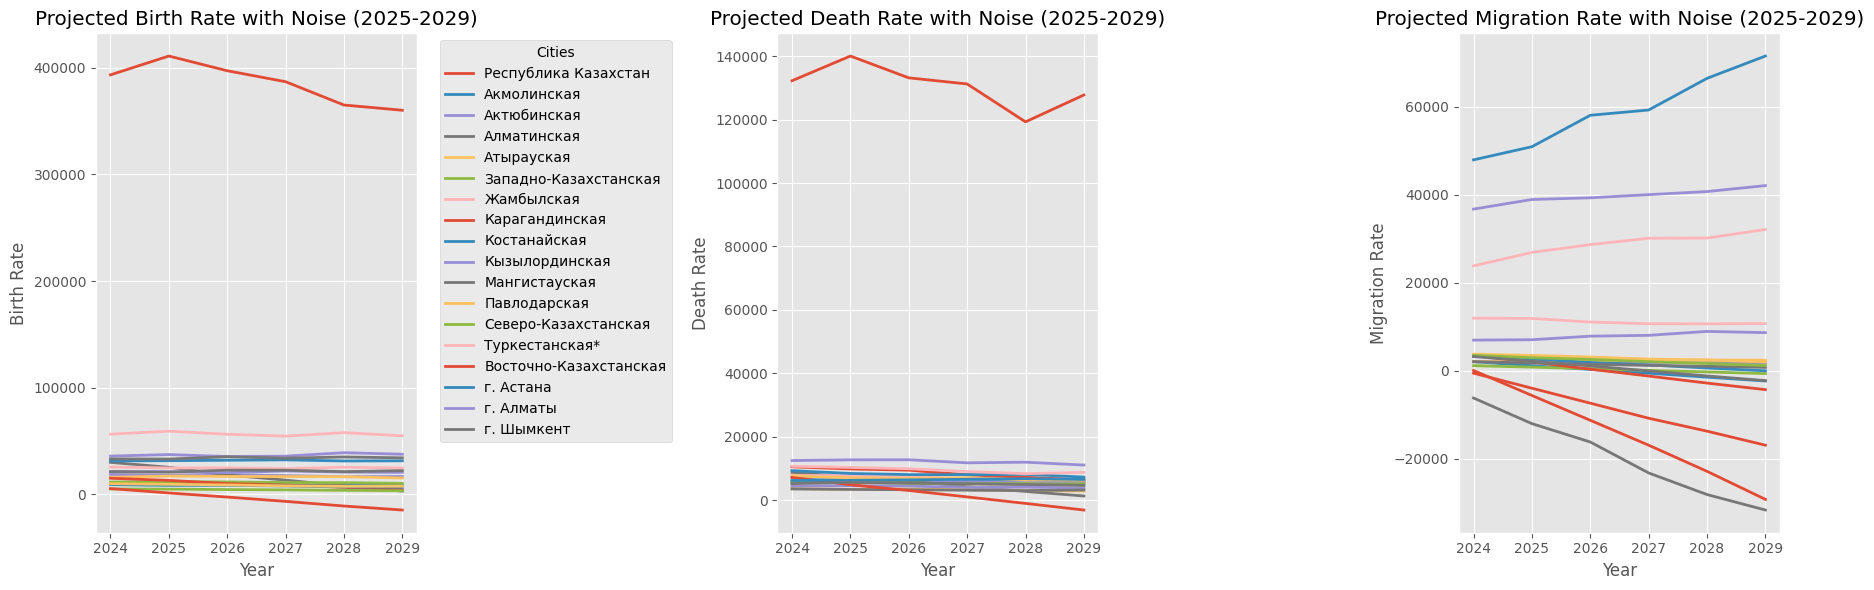

In [42]:
# Optional: Plot projections for each rate with noise
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot birth projections with noise
for city in cities:
    data = birth_proj[birth_proj['City'] == city]
    axes[0].plot(years_future, data.iloc[0, 1:], label=city, linewidth=2)
axes[0].set_title("Projected Birth Rate with Noise (2025-2029)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Birth Rate")
axes[0].legend(title="Cities", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Plot death projections with noise
for city in cities:
    data = death_proj[death_proj['City'] == city]
    axes[1].plot(years_future, data.iloc[0, 1:], label=city, linewidth=2)
axes[1].set_title("Projected Death Rate with Noise (2025-2029)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Death Rate")

# Plot migration projections with noise
for city in cities:
    data = migration_proj[migration_proj['City'] == city]
    axes[2].plot(years_future, data.iloc[0, 1:], label=city, linewidth=2)
axes[2].set_title("Projected Migration Rate with Noise (2025-2029)")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Migration Rate")

# Improve layout and display plot
plt.tight_layout()
plt.show()


          2019        2020        2021        2022      2023        2024  \
0   18395567.0  18631779.0  18879552.0  19503159.0  19766807    20033842   
1          0.0         0.0         0.0    611888.0    610198      607589   
2     738587.0    736735.0    735566.0    785708.0    788013      787976   
3     869637.0    881651.0    894333.0    916750.0    928159      939405   
4    2038935.0   2055724.0   2077967.0   1478496.0   1505896     1531167   
5     633791.0    645280.0    657110.0    681241.0    693079      704074   
6     652325.0    656844.0    661316.0    683327.0    688127      693261   
7    1125440.0   1130099.0   1139192.0   1209665.0   1218158     1222593   
8          0.0         0.0         0.0    698757.0    698726      697987   
9    1378532.0   1376882.0   1375938.0   1134966.0   1134855     1135351   
10    872795.0    868549.0    864550.0    835686.0    832234      829984   
11    794335.0    803531.0    814588.0    823251.0    833666      841929   
12    678199

TypeError: 'Axes' object is not subscriptable

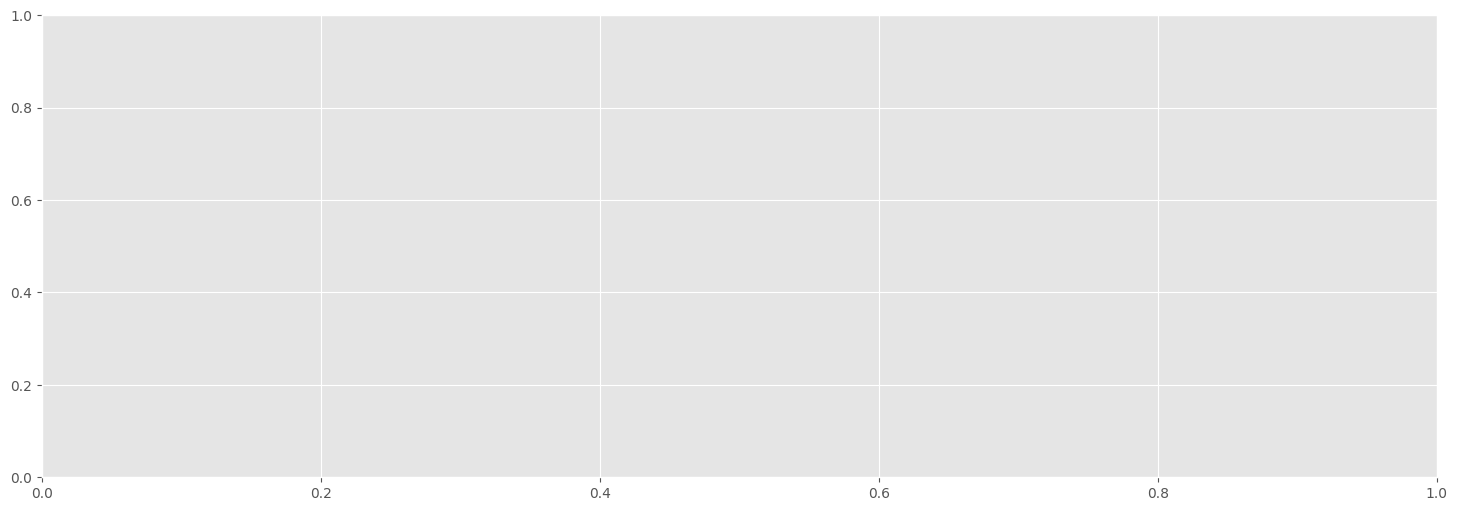

In [43]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 1, figsize=(18, 6))

print(all_population)

all_population = all_population[['City', 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029]]

print(np.append(years_past, years_future))
# Plot birth projections with noise
for city in cities:
    data = all_population[all_population['City'] == city]
    # print(data)
    axes[0].plot(np.append(years_past, years_future), data.iloc[0, 1:], label=city, linewidth=2)
axes[0].set_title("Projected Population Number (2025-2029)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Population")
axes[0].legend(title="Cities", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
